In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

data = fetch_california_housing(as_frame=True)
df = data.frame

# Features & target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [3]:
# Print metrics
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R²: 0.5758
Adjusted R²: 0.5750
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456


In [ ]:
"""✅ Step 1: Interpretation of your results
Metric	Value	Interpretation
R²	0.5758	Your model explains about 57.58% of the variance in the data — decent, but there’s room for improvement.
Adjusted R²	0.5750	Almost equal to R², which means your features are contributing and not just adding noise (good sign!).
MAE	0.5332	On average, your prediction error is around 0.53 units of the target variable.
MSE	0.5559	The squared error; larger errors are penalized more.
RMSE	0.7456	On average, the size of the error is 0.75 units. That’s larger than MAE, so there are some larger mistakes (outliers or variance)."""

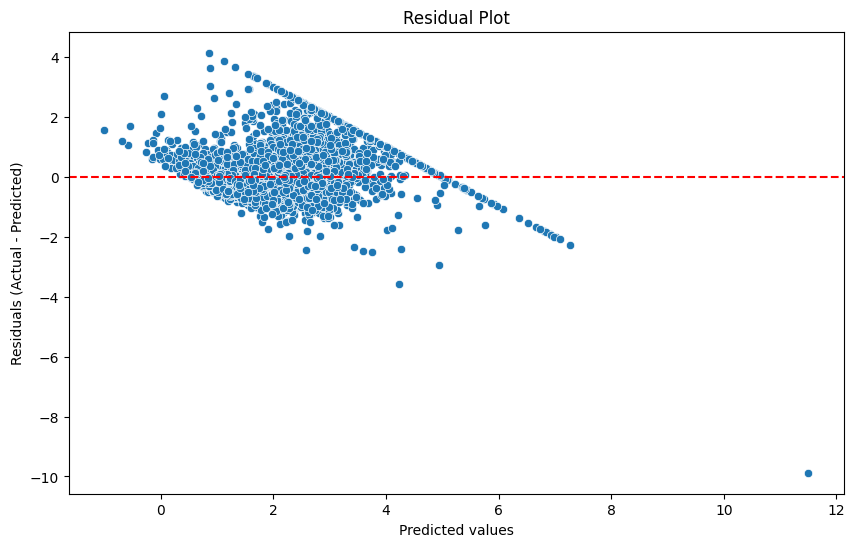

In [4]:

# Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()